In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [7]:
dataset_clean = pd.read_csv('dataset_clean.csv')
print(dataset_clean.head())

   Student_ID  Extracurricular_Hours_Per_Day  Sleep_Hours_Per_Day  \
0           1                            3.8                   38   
1           2                            3.5                   31   
2           3                            3.9                    5   
3           4                            2.1                   23   
4           5                            0.6                   16   

   Stress_Level  social_ind  Stress_ind  
0             2           1           1  
1             1           1           1  
2             1           1           1  
3             2           1           1  
4             0           1           1  


In [8]:
# Converting categorical columns 
label_encoder = LabelEncoder()
dataset_clean['Stress_Level'] = label_encoder.fit_transform(dataset_clean['Stress_Level'])

# Splitting the Data into Features and Labels
features = dataset_clean.iloc[:, :-1]  # All columns except the last one
labels = dataset_clean.iloc[:, -1]    # The last column (target)

# Splitting the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Displaying the shape of the splits
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

# Scaling the features in the training and testing sets using StandardScaler.
scaler = StandardScaler()
# 'fit_transform' is applied to the training data to compute the scaling parameters and apply the transformation.
# 'transform' is then applied to the test data using the parameters learned from the training set, ensuring consistency in scaling.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training data shape: (1600, 5), Test data shape: (400, 5)


In [9]:
# Linear Regression Model
# Creating and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)  # Fit the model with scaled training data

# Making predictions using the test data
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) and R-squared to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0
R-squared: 1.0


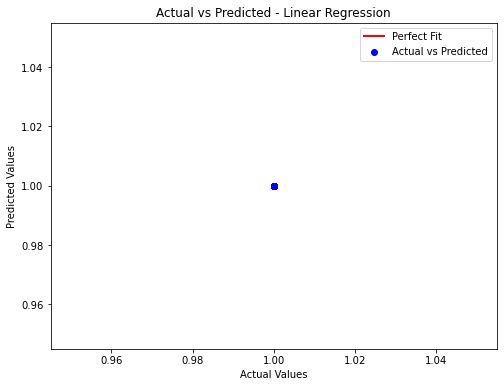

In [5]:
# Create a scatter plot to visualize the actual vs predicted values, with the actual values (y_test) on the x-axis 
# and the predicted values (y_pred) on the y-axis. The blue dots represent the actual vs predicted pairs.
# A red line is plotted to show the "Perfect Fit" line, where the predicted values exactly match the actual values.
# This helps to assess the model's performance visually.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Linear Regression')
plt.legend()
plt.show()